<a href="https://colab.research.google.com/github/AamirJafaq/CustomerSigmention.KMeansDBSCAN/blob/main/Clustering_KMeansDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## KMeans Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I am using colab. So, I attached a csv file with python script to upload the file. Otherwise you can upload csv file in other ways if you are using GitHub or saving file in local computer.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Notice that the columns have no missing values

In this project, we are only interested in annual income and spending score. So, choose only Annual Income and Spending Score columns.

In [ ]:
X=data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
X_s=scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia=[]
for i in range(10):
  model=KMeans(n_clusters=i+1, init="k-means++", n_init=5, random_state=20 )
  model.fit(X_s)
  inertia.append(model.inertia_)


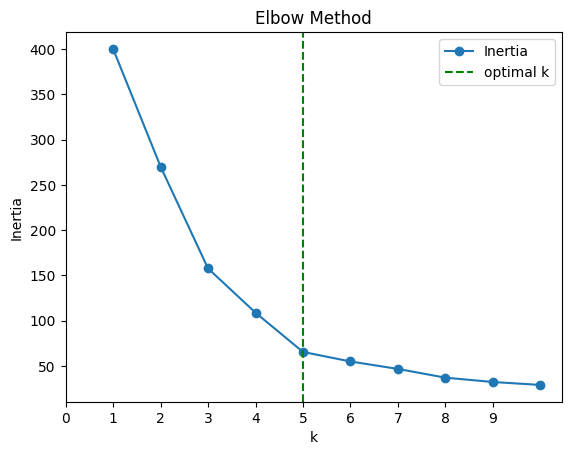

In [ ]:
plt.plot(range(1, 11),inertia, marker="o", label="Inertia")
plt.axvline(x=5, linestyle="--", color="green", label="optimal k")
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks([j for j in range(10)])
plt.legend()
plt.show()

Notice that the decreasing rate of inertia shaprly slow down after the value k=5. Therefore, the optimal value of k would be k=5.

In [ ]:
kmeans=KMeans(n_clusters=5, init="k-means++", n_init=5, random_state=20 )
kmeans.fit(X_s)

KMeans(n_clusters=5, n_init=5, random_state=20)

In [ ]:
data["Cluster"]=kmeans.predict(X_s)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


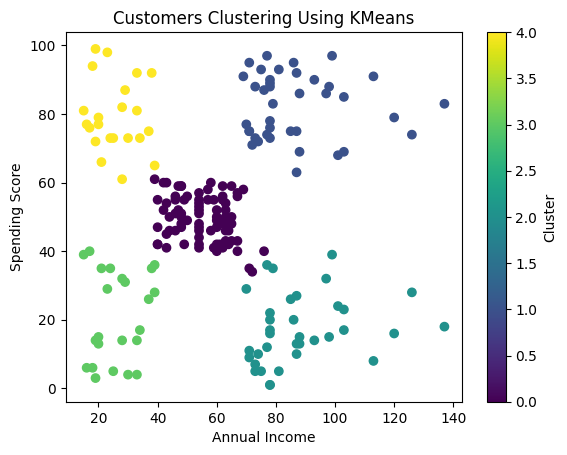

In [ ]:
plt.scatter(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"], c=data["Cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customers Clustering Using KMeans")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Spliting data for each cluster.
Clusters=dict(tuple(data.groupby(data["Cluster"])))
Cluster1=Clusters[0]
Cluster2=Clusters[1]
Cluster3=Clusters[2]
Cluster4=Clusters[3]
Cluster5=Clusters[4]

In [ ]:
data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().sort_values(by="Annual Income (k$)", ascending=False)

,Annual Income (k$),Spending Score (1-100)
Cluster,,
2,88.200000,17.114286
1,86.538462,82.128205
0,55.296296,49.518519
3,26.304348,20.913043
4,25.727273,79.363636


Notice that cluster 2 has highest average income but less spending score. However, cluster 4 has high spending score but less annual income. So, customers in cluster 2 are misers while customers of cluster 4 are extravagance. However, customers in other groups are almost spend equal proportions of their income.

Now, we will evaluate the performace of KMeans Clustering using Silhouette Score metric. It value ranges from -1 to 1. The higher the value of Silhouette Score, the better is the clustering.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
labels=kmeans.labels_

In [ ]:
score=silhouette_score(X_s, labels)
print(f"The silhouette score for KMeans is {score:.2f}")

The silhouette score for KMeans is 0.55


## DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN()
dbscan.fit(X_s)

DBSCAN()